# <center>2. Візуальний аналіз даних</center>
## <center>2.1 Основи matplotlib, seaborn та ploty</center>

Імпортуємо всі необхідні бібліотеки і дещо налаштуємо відображення зображень.

In [1]:
# будемо відображати графіки прямо в jupyter'і
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графіки в svg виглядають більш чіткими
%config InlineBackend.figure_format = 'svg' 

#збільшимо дефолтний розмір графіків
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Після цього завантажимо в `dataframe` дані, з якими будемо працювати. Для прикладів візуалізації виберемо дані про продажіі оцінки відео-ігр з  [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). Дані про оцінки ігр є не для всіх рядків, тому відразу залишаємо тільки ті записи, за якими є повні дані.

Доступ до даних на google drive, якщо ви відкриваєте блокнот в google colab, а не на PC, можна отримати шляхом монтування google drive


In [2]:
#Uncomment if use in google collab

"""
!pip install google-colab
!pip install pydrive
"""



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
"""
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
"""

In [ ]:
"""
downloaded = drive.CreateFile({'id':"176EUUJC9eSbuLZcpNeg94DZW6PN-avwN"})
downloaded.GetContentFile('video_games_sales.csv')
"""

In [5]:
df = pd.read_csv('video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [7]:
df['User_Score'] = df.User_Score.astype('float64')
df['Year_of_Release'] = df.Year_of_Release.astype('int64')
df['User_Count'] = df.User_Count.astype('int64')
df['Critic_Count'] = df.Critic_Count.astype('int64')

Всього в таблиці 6825 об'єктів і 16 ознак для них. Подивимося на декілька перших записів за допомогою методу head, щоб впевнитися, що все було розпарсино правильно. Для зручності залишаємо тільки ті ознаки, які ми будемо в подальшому використовувати.

In [8]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


Перш ніж ми перейдемо до розгляду методів бібліотек seaborn, обговоримо найбільш простий і як правило зручний спосіб візуалізації даних з pandas dataframe — це використання функції plot.
Для прикладу побудуємо графік продаж відео ігр в різноманітних країнах в залежності від року. Для початку відфільтруємо тільки потрібні нам стовбці, потім підрахуємо сумарні продажі по рокам і в отриманого dataframe викличичимо функцію plot без параметрів. 

Реалізуємо функції plot в pandas заснована на використанні бібліотеки matplotlib. 


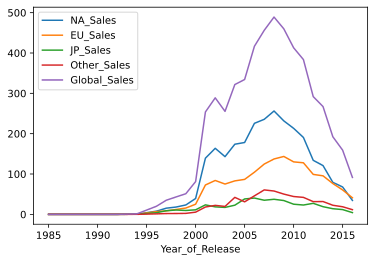

In [9]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

За допомогою параметра kind можна змінити тип графіка, наприклад, на bar chart. Matplotlib дозволяє дуже гнучко налаштовувати графіки. На графіку можна змінити майже все, що завгодно, але потрібно поритися в документації і знайти потрібні параметри. Наприклад, параметр rot відповідає за кут нахилу підписів до осей x.

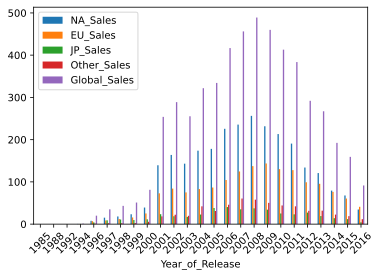

In [10]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

## Seaborn

Тепер давайте перейдемо до бібліотеки seaborn. Seaborn — це по суті більш високорівневе API на базі бібліотеки matplotlib. Seaborn містить більш адекватні дефолтні настройки оформлення графіків. Також в бібліотеці є достатньо складні типи візуалізації, які в matplotlib потребували б більшої кількості коду.

Познайомтесь з першим таким "складним" типом графіків pair plot (scatter plot matrix). Ця візуалізація допоможе нам подивитися на одному рисунку, як пов'язані між собою різні ознаки. 

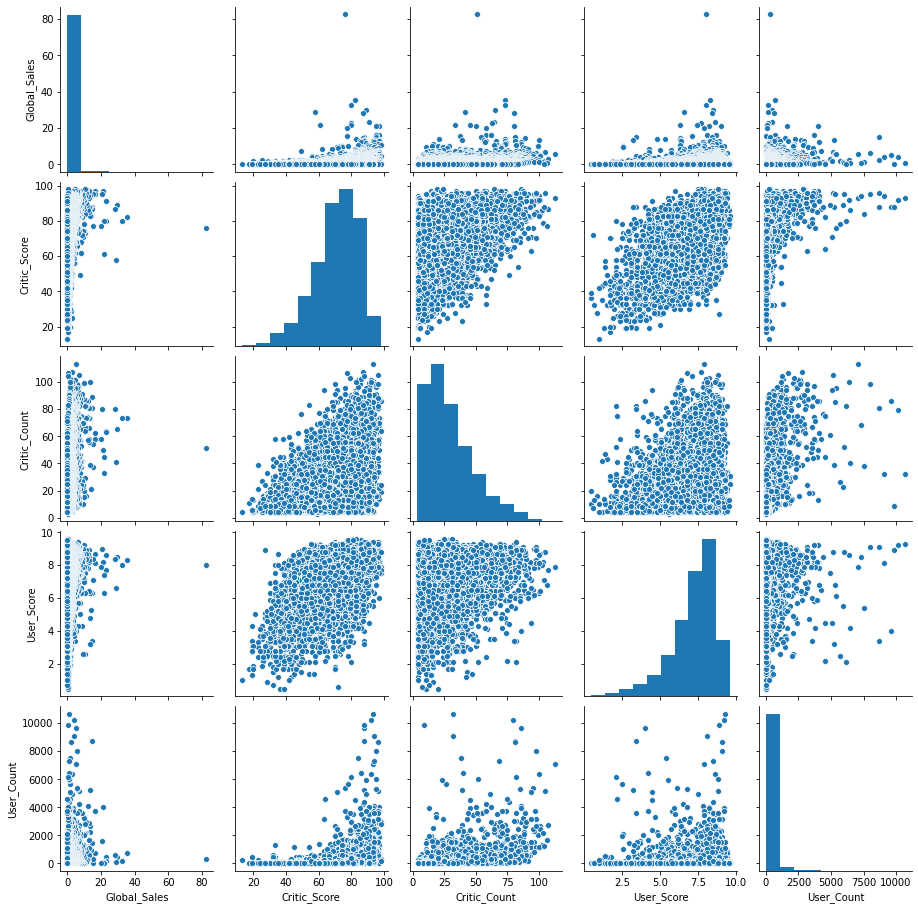

In [11]:
# c svg pairplot браузер працює сповільнено
%config InlineBackend.figure_format = 'png' 
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

Також за допомогою `seaborn` можна побудувати розподіл. Для прикладу подивимося на розподіл оцінок критиків `Critic_Score`. Для цього побудуємо __`distplot`__. За замовчуванням на графіку відображається гістограма і [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation).

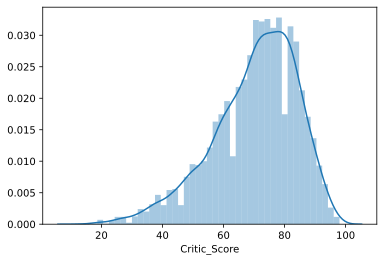

In [12]:
%config InlineBackend.figure_format = 'svg' 
sns.distplot(df.Critic_Score);

Для того щоб детальніше подивитися на взаємозвязок двох числових ознак, є ще і __`joint_plot`__ – це гібрид `scatter plot` і `histogram` (відображаються також гістограми розподілів ознак). Подивимося на те, як пов'язані між собою оцінки критиків `Critic_Score` і оцінки користувача `User_Score`.

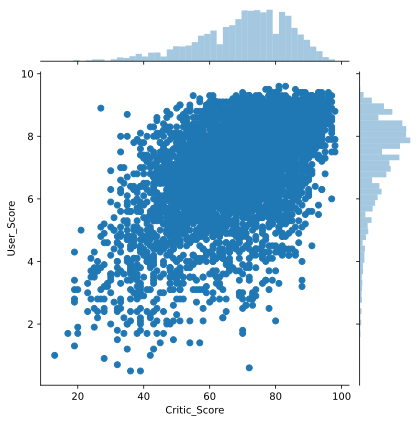

In [13]:
sns.jointplot(x='Critic_Score', y='User_Score', data=df, kind='scatter');

Ще один корисний тип графіків – це __`box plot`__. Давайте порівняємо користувацькі оцінки ігр для топ-5 найбільших ігрових платформ.

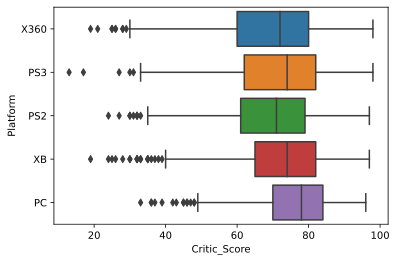

In [14]:
top_platforms = df.Platform.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df.Platform.isin(top_platforms)], orient="h");

Думаю, варто обговорити дещо детальніше, як розуміти `box plot`. `Box plot` складається з коробки (тому він і називається `box plot`), вусиків і точок. Коробка показує інтерквантильний розмах розподілу, тобто відповідно 25% (`Q1`) і 75% (`Q3`) процентілі. Риска всередині коробки позначає медіану розподілу. 
З коробкою розібралися, перейдемо до вус. Вуса відображають весь разкид точок крім викидів, тобто є мінімальні і максимальні значення, які потрапляють в проміжок `(Q1 - 1.5*IQR, Q3 + 1.5*IQR)`, де `IQR = Q3 - Q1` - інтерквантильний розмах. Точками на графіку позначаються викиди (`outliers`) - ті значення, які не вписуються в проміжок значень, заданий вусами графіка.


І ще один тип графіків (останній з тих, які ми розглядаємо в цій статті) - це __`heat map`__. `Heat map` дозволяє подивитися на розподіл якоїсь числової ознаки за двома категоріальними. Візуалізуємо сумарні продажі ігр за жанрами і ігровим платформам.

In [15]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)

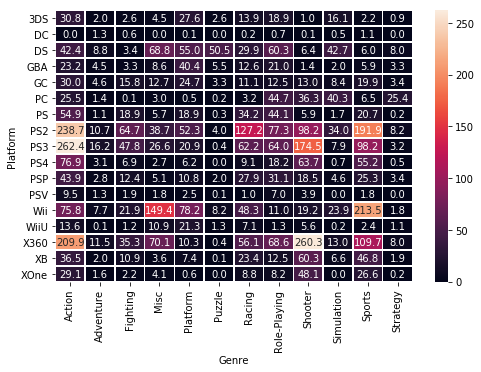

In [ ]:
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

## Plotly

Ми розглянули візуалізації на базі бібліотеки `matplotlib`. Однак, це не єдина опція для побудови графіків на мові `python`. Познайомтесь також з бібліотекою __`plotly`__. `Plotly` - це open-source бібліотека, яка дозволяє будувати інтерактивні графіки в jupyter.notebook'e без необхідності зариватися в javascript код. 

Краса інтерактивних графіків полягає в тому, що можна подивитися точне числове значення при наведенні мишки, приховати нецікаві ряди у візуалізації, наблизити задану ділянку графіка і т.д.

Перед початком роботи імпортуємо всі необхідні модулі і ініціалізуємо `plotly` за допомогою команди `init_notebook_mode`.

In [16]:
!pip install plotly

You need to add a method "enable_plotly_in_cell" in order to use Plotly in Colab.

In [17]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
  init_notebook_mode(connected=False)

In [18]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

Для початку побудуємо __`line plot`__ з динамікою кількості створюваних ігр і їх продажі за роками. 

In [19]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']

В `plotly` будується візуалізація об'єкта `Figure`, який складається з даних (масив ліній, які в бібліотеці називаються `traces`) і оформлення/стилю, за який відповідає об'єкт `layout`. В простих випадках можна викликати функцію `iplot` і просто від масиву `traces`.

In [20]:
enable_plotly_in_cell()

trace0 = go.Scatter(
    x=years_df.index,
    y=years_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

fig = go.Figure(data=data, layout=layout)

iplot(data, show_link=False)

Output hidden; open in https://colab.research.google.com to view.

Також можна відразу зберегти графік у вигляді html-файлу.

In [21]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

In [ ]:
!ls

gdrive	sample_data  years_stats.html


Подивимося також на ринкову долю ігрових платформ, розраховану за кількістю випущених ігр і за сумарним прибутком. Для цього побудуємо __`bar chart`__.

In [22]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [23]:
enable_plotly_in_cell()

trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Global_Sales,
    name='Global Sales'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df.Number_of_Games,
    name='Number of games released'
)

data = [trace0, trace1]
layout = {'title': 'Share of platforms'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Output hidden; open in https://colab.research.google.com to view.

В `plotly` можна побудувати і __`box plot`__. Розглянемо різноманіття оцінок критиків в залежності від жанру гри.

In [25]:
enable_plotly_in_cell()

data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre].Critic_Score, name=genre)
    )
iplot(data, show_link = False)

Output hidden; open in https://colab.research.google.com to view.